In [1]:
import numpy as np
import pandas as pd
from scipy.misc import comb
from sympy import *
import matplotlib.pyplot as plt
import random
import time
from scipy.interpolate import UnivariateSpline
import scipy.integrate as sci_integrate
%matplotlib inline
init_printing(use_latex=True)

In [2]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

# Proyecto 1 - Modelado matemático II - <font color='red'> Michael Puentes</font> 

In [3]:
#Function of the 8 student number
def f(x):
    return np.exp(-x**2)

#### Tarea 1. Interpolación

El polinomio que me ha tocado es el polinomio de $Hermite, W(x) = e^{-x^2}$

1.1. Elabórese un programa para calcular su polinomio ortogonal $P_n (x)$ usando las relaciones de recurrencia

la Relacion de recurrencia es: $Hn(x)=2xHn−1(x)−2(n−1)Hn−2(x)$

In [4]:
x = symbols('x')
def PolHermite(n):
    if n==0:
        return 1.
    if n==1:
        return 2.*x
    return (2*x*PolHermite(n-1)-2*(n-1)*PolHermite(n-2))
    

In [5]:
n = 3
RES= PolHermite(n)
print "Polinomio Hermite grado [",n,"] =>"
RES

Polinomio Hermite grado [ 3 ] =>


### 1.2. <font color='red'>Dentro del intervalo de definición escójase $ne=11$ nodos equidistantes $xe(i), i=\overline{1,11}$ y encuéntrese los valores del polinomio en estos nodos $ye(i), i=\overline{1,11}$ </font>

In [6]:
ne = 11
h = 2./(ne-1)
#xe = np.array([-5 +(i-1)*(h) for i in range(1,ne+1)]) #Nodos Equidistantes
xe = np.array(range(-10,12,2)) #Límites
print "nodos equidistantes: ",xe

y = lambdify(x,RES,'numpy')#Funcion Hermite
A_y = y(xe)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.

nodos equidistantes:  [-10  -8  -6  -4  -2   0   2   4   6   8  10]


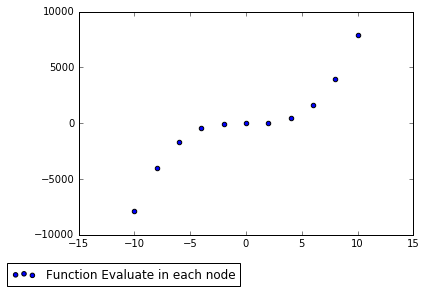

In [7]:
plt.scatter(xe, A_y, c="blue", label = "Function Evaluate in each node")
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.1))
plt.show()

### 1.3. <font color='red'>Elabórese 3 programas para calcular los polinomios intepolantes en la base de algoritmos:</font> 
#### -Lagrange global, segmentarias lineal y parabólica.

En análisis numérico, el polinomio de Lagrange, llamado así en honor a Joseph-Louis de Lagrange, es una forma de presentar el polinomio que interpola un conjunto de puntos dado. Lagrange publicó este resultado en 1795, pero lo descubrió Edward Waring en 1779 y fue redescubierto más tarde por Leonhard Euler en 1783.1 Dado que existe un único polinomio interpolador para un determinado conjunto de puntos, resulta algo engañoso llamar a este polinomio el polinomio interpolador de Lagrange. Un nombre más apropiado es interpolación polinómica en la forma de Lagrange [info](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Lagrange)

In [8]:
#FUNCTION LAGRANGE
def Fun_Lagrange(n,Xe,Ye):
    ''' Dimension de Xe y Ye
        n = número de nodos equidistantes
        Xe = valor de cada nodo
        Ye = Funcion Hermite evaluada en cada nodo.''' 
    res = 0
    for i in range (1,n):
        l=1. #funcion polinómica
        for j in range (1,n):
            if j != i:
                l = l * (symbols('x')- xe[j]) / (xe[i] - xe[j])
                #print "L[",j,"]=",l
              
        res = res +l*Ye[i]  
        #print "result[",i,"]=",res  
    return res

In [9]:
ne = 11
h = 2./(ne-1)
#xe = np.array([-5 +(i-1)*(h) for i in range(1,ne+1)]) #Nodos Equidistantes
xe = np.array(range(-10,12,2)) #Límites
print "nodos equidistantes: ",xe

y = lambdify(x,RES,'numpy')#Funcion Hermite
A_y = y(xe)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.

#Interpolacion
poli = Fun_Lagrange(ne,xe,A_y)#Polinomios de Langrange
f = lambdify(x, poli)
xd = np.linspace(-10,10,11)#11 nodos equidistantes
yi_11 = f(xd)
Fun_analitica = y(xd)

nodos equidistantes:  [-10  -8  -6  -4  -2   0   2   4   6   8  10]


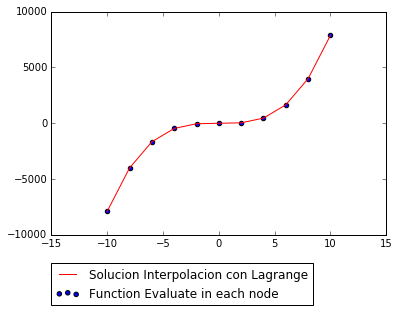

In [10]:
plt.plot(xd,yi_11, color = "red", label= "Solucion Interpolacion con Lagrange")
plt.scatter(xe, A_y, c="blue", label = "Function Evaluate in each node")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()

In [11]:
Tabla_results = pd.DataFrame({"Sol Analitica":Fun_analitica ,"Interpolacion": yi_11, "Diferencia":(Fun_analitica-yi_11)})
Tabla_results.head()

,Diferencia,Interpolacion,Sol Analitica
0,2.473826e-10,-7880,-7880
1,2.592060e-11,-4000,-4000
2,1.364242e-12,-1656,-1656
3,1.136868e-13,-464,-464
4,-3.268497e-13,-40,-40


Hasta ahora, el foco de nuestra discusión ha sido la interpolación de una función dada $f$ sobre una malla dentro
de en un intervalo $[a, b]$, por un polinomio en ese intervalo sea a través de la interpolación de Lagrange o
interpolación de Newton, o usando otros tipos de funciones de base. Cada una de estas construcciones fue de
carácter <b>global</b>, en el sentido de que la aproximación se define por la misma expresión en todo el intervalo $[a,
b]$. Una alternativa y la manera más flexible de aproximar una función f es dividir el intervalo $[a, b]$ global en una
serie de subintervalos <b>locales</b> y buscar una aproximación a trozos por polinomios de grado más bajo. Tales
aproximaciones polinómicas a trozos se llama la <b>interpolación segmentaria</b>. [info](http://www4.ujaen.es/~angelcid/Archivos/An_Met_Num_INFORMATICA/Splines.pdf)


In [12]:
print "function Hermite to evaluate:"
newRES = simplify(RES)
newRES

function Hermite to evaluate:


In [13]:
#FUNCTION SEGMENTARIA LIENEAL
def segmentacion_lineal(ne,a,b,puntos):
    h = (b-a)/ne
    polinomios = []
    estimaciones = []
    #Encontrar segmento donde esta el punto x que queremos estimar
    for i in range(0,ne):
        a = float(puntos[i])
        b = float(puntos[i+1])
        punto = puntos[i] #(a+b)/2.
        k = int((punto-a)/h)+1
        xk = a + (k-1)*h
        xk_1 = xk +h
        yk = RES.subs({x: xk})
        yk_1 = RES.subs({x: xk_1})
        estimacion = yk +((yk_1 - yk)/(xk_1-xk))*(punto-xk)
        polinomio = yk +((yk_1 - yk)/(xk_1-xk))*(symbols('x')-xk)
        polinomios.append(polinomio)
        estimaciones.append(estimacion)
    return polinomios,estimaciones
            
n = 11
a, b = -10.,12.
h = (b-a)/n
puntos = np.array(range(-10,14,2)) #Límites
pol_estimacion_Lineal, estimacion_Lineal = segmentacion_lineal(n,a,b,puntos)
print "función de la tercera segmentación"
pol_estimacion_Lineal[0]

función de la tercera segmentación


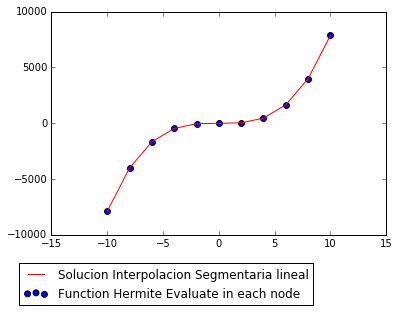

,Diferencia,Interpolacion,Sol Analitica
0,0,-7880.00000000000,-7880
1,0,-4000.00000000000,-4000
2,0,-1656.00000000000,-1656
3,0,-464.000000000000,-464
4,0,-40.0000000000000,-40
5,0.0,0,-0
6,0,40.0000000000000,40
7,0,464.000000000000,464
8,0,1656.00000000000,1656
9,0,4000.00000000000,4000


In [14]:
#Interpolacion
#print estimacion_Lineal
Fun_analitica = y(xe)

plt.scatter(xe, Fun_analitica, c="b", label = "Function Hermite Evaluate in each node",s=35)
plt.plot(xe,estimacion_Lineal, color = "r", label= "Solucion Interpolacion Segmentaria lineal")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":Fun_analitica ,"Interpolacion": estimacion_Lineal, "Diferencia":(Fun_analitica-estimacion_Lineal)})
Tabla_results

In [15]:
#FUNCIÓN PARABÓLICA O CUADRÁTICA
def fun_parabolica(ne,a,h,puntosX):
    polinomios = []
    estimados = []
    for i in range(0,ne):
        punto = float(puntosX[i])
        a = float(puntos[i])
        b = float(puntos[i+1])
        #print "x: ",punto, "a:",a,b,h
        #Encontrar segmento donde esta el punto x
        k = int((punto-a)/h)+1
        xk = a + (k-1)*h
        xk_1 = xk+h
        xk_2 = xk + 2*h
        yk = RES.subs({x: xk})
        yk_1 = RES.subs({x: xk_1})
        yk_2 = RES.subs({x: xk_2})

        polinomio = yk +(yk_1 - yk)*((symbols('x')-xk)/h ) +(yk_2-2*yk_1-yk)*(symbols('x')-xk)*(symbols('x')-xk_1)/h**2
        estimado = yk +(yk_1 - yk)*((punto-xk)/h ) +(yk_2-2*yk_1-yk)*(punto-xk)*(punto-xk_1)/h**2
        polinomios.append(polinomio)
        estimados.append(estimado)
    return polinomios, estimados
            
n = 11
a, b = -10., 10.
h = (b-a)/n
print xe
puntos = np.array(range(-10,14,2)) #Límites
polinomiosC, estimacion_parabolica = fun_parabolica(n,a,h,puntos)
outer = simplify(polinomiosC[0])
outer

[-10  -8  -6  -4  -2   0   2   4   6   8  10]


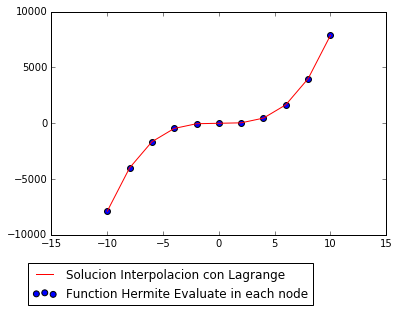

,Diferencia,Interpolacion,Sol Analitica
0,0,-7880.00000000000,-7880
1,0,-4000.00000000000,-4000
2,0,-1656.00000000000,-1656
3,0,-464.000000000000,-464
4,0,-40.0000000000000,-40


In [16]:

y = lambdify(x,RES,'numpy')#Funcion Hermite
fun_Analitycal = y(xe)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.
xd = np.linspace(-10,10,1000)

plt.scatter(xe, fun_Analitycal, c="blue", label = "Function Hermite Evaluate in each node",s=35)
plt.plot(xe,estimacion_parabolica, color = "red", label= "Solucion Interpolacion con Lagrange")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":Fun_analitica ,"Interpolacion": estimacion_parabolica, "Diferencia":(Fun_analitica-estimacion_parabolica)})
Tabla_results.head()

### 1.4 <font color='red'>Dentro del intervalo de definición escójase $n = 200$ nodos equidistantes $x(i), i = \bar{1, 200}$ y encuéntrese los valores del polinomio en estos nodos $y(i), i=\bar{1, 200}$ mediante de $3$ funciones intepolantes y compárese los resultados con los valores exactos.</font>

nodos equidistantes:  [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


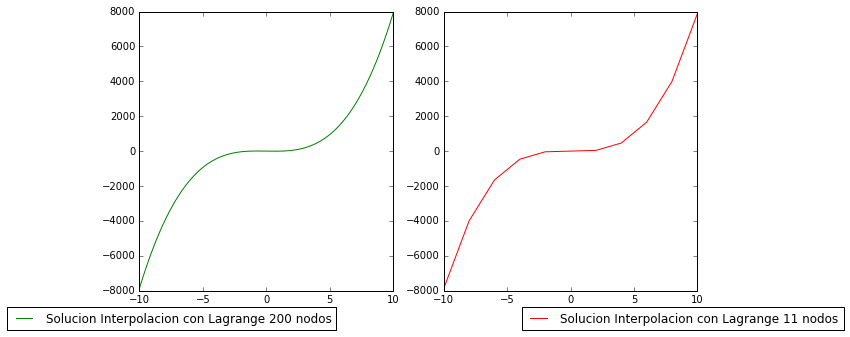

,Diferencia,Interpolacion,Sol Analitica
0,1.455192e-10,-7880,-7880
1,1.591616e-11,-4000,-4000
2,1.364242e-12,-1656,-1656
3,1.136868e-13,-464,-464
4,-3.268497e-13,-40,-40
5,-0.000000e+00,0,-0
6,1.421085e-14,40,40
7,1.705303e-13,464,464
8,1.364242e-12,1656,1656
9,3.637979e-12,4000,4000


In [17]:
#LAGRANGE
ne = 11
h = 2./(ne-1)
#xe = np.array([-5 +(i-1)*(h) for i in range(1,ne+1)]) #Nodos Equidistantes
#xe = np.array(range(-10,12,2)) #Límites
xe = np.linspace(-10.,10.,ne)
print "nodos equidistantes: ",xe

y = lambdify(x,RES,'numpy')#Funcion Hermite
A_y = y(xe)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.

#Interpolacion
poli = Fun_Lagrange(ne,xe,A_y)#Polinomios de Langrange
f = lambdify(x, poli)
xd2 = np.linspace(-10,10,200)
xd = np.linspace(-10,10,11)
yi = f(xd)
yi2 = f(xd2)
Fun_analitica = y(xd)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#plt.scatter(xe, A_y, c="blue", label = "Function Evaluate in each node")
plt.plot(xd2,yi2, color = "g", label= "Solucion Interpolacion con Lagrange 200 nodos")
plt.legend(loc='right', bbox_to_anchor=(0.8, -0.1))
plt.subplot(1,2,2)
plt.plot(xd,yi, color = "red", label= "Solucion Interpolacion con Lagrange 11 nodos")
plt.legend(loc='right', bbox_to_anchor=(1.6, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":Fun_analitica ,"Interpolacion": yi,"Diferencia":(Fun_analitica-yi)})
Tabla_results

In [18]:
#SEGMENTARIA LINEAL
a,b = -10.,10.
ne = 200
step=20./ne
puntos = list(frange(-10, 10, step))
print step,len(puntos),puntos[0],puntos[ne]
pol_estimacion_Lineal, estimacion_Lineal = segmentacion_lineal(ne,a,b,puntos)
print "función de la tercera segmentación", len(estimacion_Lineal)
del puntos[-1]
pol_estimacion_Lineal[0]

0.1 201 -10 10.0
función de la tercera segmentación 200


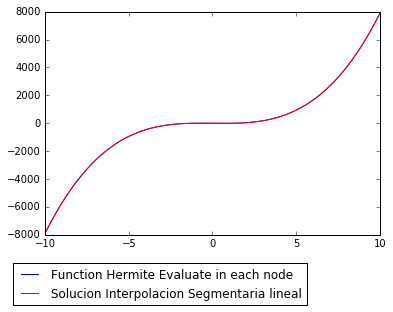

,Diferencia,Interpolacion,Sol Analitica
195,213.267141875967,6744.99999999992,6958.267142
196,218.910358195950,6962.68799999992,7181.598358
197,224.647755149658,7184.98399999992,7409.631755
198,230.480059997558,7411.93599999992,7642.416060
199,236.408000000087,7643.59199999991,7880.000000


In [19]:
xReal = np.linspace(-10,10,200)

#print estimacion_Lineal
Fun_analitica = y(xReal)

#Función Real Hermtite
f = lambdify(x, RES)

FA_200 = f(xReal)

plt.plot(xReal, Fun_analitica, c="b", label = "Function Hermite Evaluate in each node")
plt.plot(puntos,estimacion_Lineal, color = "r", label= "Solucion Interpolacion Segmentaria lineal")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":FA_200 ,"Interpolacion": estimacion_Lineal, "Diferencia":(FA_200-estimacion_Lineal)})
Tabla_results.tail()

In [20]:
#SEGMENTARIA CUADRÁTICA
a,b = -10.,10.
ne = 200
step=20./ne
puntos = list(frange(-10, 10, step))
#puntos = np.linspace(-10,10,201)
print step,len(puntos),puntos[0]
h = (b-a)/ne
polinomiosC, estimacion_parabolica = fun_parabolica(ne,a,h,puntos)
del puntos[-1]
print len(estimacion_parabolica),len(puntos)
outer = simplify(polinomiosC[0])
outer

0.1 201 -10
200 200


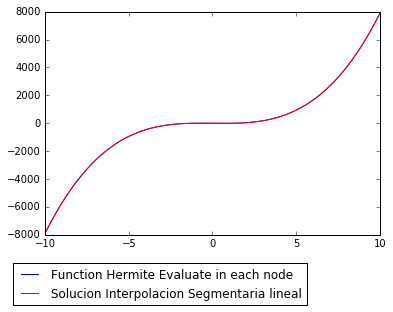

,Diferencia,Interpolacion,Sol Analitica
195,213.267141875967,6744.99999999992,6958.267142
196,218.910358195950,6962.68799999992,7181.598358
197,224.647755149658,7184.98399999992,7409.631755
198,230.480059997558,7411.93599999992,7642.416060
199,236.408000000087,7643.59199999991,7880.000000


In [21]:
#print estimacion_Lineal
xReal = np.linspace(-10,10,200)
Fun_analitica = y(xReal)

#Función Real Hermtite
f = lambdify(x, RES)
FA_200 = f(xReal)

plt.plot(xReal, Fun_analitica, c="b", label = "Function Hermite Evaluate in each node")
plt.plot(puntos,estimacion_parabolica, color = "r", label= "Solucion Interpolacion Segmentaria lineal")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":FA_200 ,"Interpolacion": estimacion_parabolica, "Diferencia":(FA_200-estimacion_parabolica)})
Tabla_results.tail()

### 1.5. <font color='red'>Introduzca los errores aleatorios de 1%en los valores del polinomio $ye(i) = ye(i)+ 0.01*random, i = \bar{1, 11}$ y con estos nuevos valores realícese la tarea 1.4.</font>

In [22]:
#ERROR RANDOM
ne = 200
r = np.random.rand(ne)
error = r*0.01

nodos equidistantes:  200 Elementos de error:  200
primer elemento:  7880.0 Con error:  7880.00027039 elemento x:  10.0
200


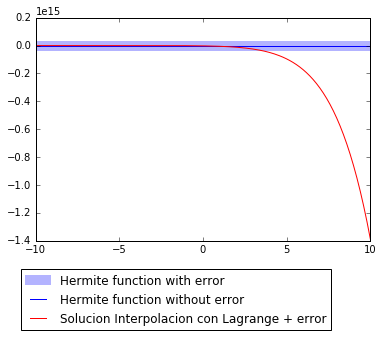

,Diferencia,Hermite,Hermite + Error,Interpolacion,x
195,1.149680e+15,6958.267142,6958.271558,-1.149680e+15,9.597990
196,1.205452e+15,7181.598358,7181.606783,-1.205452e+15,9.698492
197,1.263617e+15,7409.631755,7409.633008,-1.263617e+15,9.798995
198,1.324263e+15,7642.416060,7642.420951,-1.324263e+15,9.899497
199,1.387483e+15,7880.000000,7880.000270,-1.387483e+15,10.000000


In [23]:
#LAGRANGE
xe = np.linspace(-10.,10.,ne)

print "nodos equidistantes: ",len(xe), "Elementos de error: ",len(error)
y = lambdify(x,RES,'numpy')#Funcion Hermite
A_y = y(xe)
A_y_error = [A + B for A, B in zip(y(xe), error)]#suma el error a cada elemento del vector
print "primer elemento: ",A_y[ne-1],"Con error: ",A_y_error[ne-1],"elemento x: ",xe[ne-1]
#Interpolacion
nodosLagrange=11
print len(xe)
poli = Fun_Lagrange(nodosLagrange,xe,A_y_error)#Polinomios de Langrange + error
f = lambdify(x, poli)
yi = f(xe)

plt.plot(xe, A_y_error, c="b", label = "Hermite function with error",lw=10,alpha=0.3)
plt.plot(xe,A_y, color = "b", label= "Hermite function without error")
plt.plot(xe,yi, color = "r", label= "Solucion Interpolacion con Lagrange + error")
plt.legend(loc='best', bbox_to_anchor=(0.9, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Hermite":A_y ,"Hermite + Error":A_y_error,"x ":xe, "Interpolacion": yi, "Diferencia":(A_y-yi)})
Tabla_results.tail()

<b>plot the function Hermie and the function with error</b>

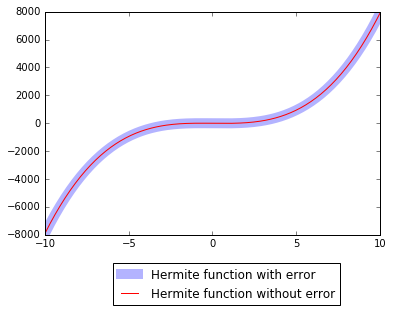

In [24]:
plt.plot(xe, A_y_error, c="b", label = "Hermite function with error",lw=10,alpha=0.3)
plt.plot(xe,A_y, color = "r", label= "Hermite function without error")
plt.legend(loc='best', bbox_to_anchor=(0.9, -0.1))
plt.show()

In [25]:
#SEGMENTARIA LINEAL
a,b = -10.,10.
ne = 200
step=20./ne
puntos = list(frange(-10, 10, step))
print step,len(puntos),puntos[0],puntos[ne]
pol_estimacion_Lineal, estimacion_Lineal = segmentacion_lineal(ne,a,b,puntos)
print "función de la tercera segmentación", len(estimacion_Lineal)
del puntos[-1]
pol_estimacion_Lineal[0]


0.1 201 -10 10.0
función de la tercera segmentación 200


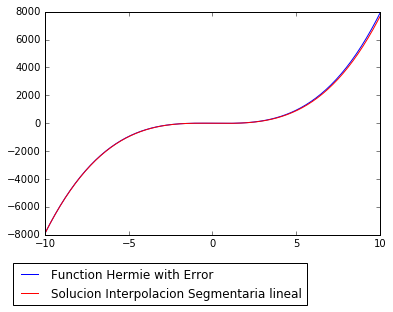

,Interpolacion,Sol Analitica
195,6744.99999999992,6958.271558
196,6962.68799999992,7181.606783
197,7184.98399999992,7409.633008
198,7411.93599999992,7642.420951
199,7643.59199999991,7880.000270


In [26]:
xReal = np.linspace(-10,10,200)

#print estimacion_Lineal
Fun_analitica = y(xReal)
#Función Real Hermtite
f = lambdify(x, RES)
FA_200 = f(xReal)

plt.plot(xReal, A_y_error, c="b", label = "Function Hermie with Error")
plt.plot(xReal,estimacion_Lineal, color = "r", label= "Solucion Interpolacion Segmentaria lineal")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":A_y_error ,"Interpolacion": estimacion_Lineal})
Tabla_results.tail()

In [27]:
#SEGMENTARIA CUADRÁTICA
a,b = -10.,10.
ne = 200
step=20./ne
puntos = list(frange(-10, 10, step))
#puntos = np.linspace(-10,10,201)
print step,len(puntos),puntos[0]
h = (b-a)/ne
polinomiosC, estimacion_parabolica = fun_parabolica(ne,a,h,puntos)
del puntos[-1]
print len(estimacion_parabolica),len(puntos)
outer = simplify(polinomiosC[0])
outer

0.1 201 -10
200 200


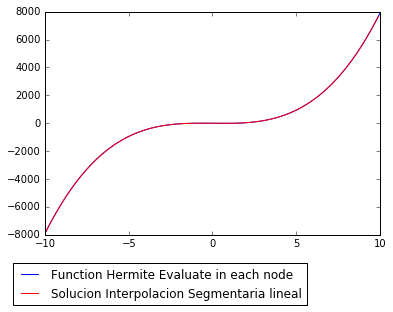

,Interpolacion,Sol Analitica
195,6744.99999999992,6958.271558
196,6962.68799999992,7181.606783
197,7184.98399999992,7409.633008
198,7411.93599999992,7642.420951
199,7643.59199999991,7880.000270


In [28]:
#print estimacion_Lineal
xReal = np.linspace(-10,10,200)
Fun_analitica = y(xReal)

#Función Real Hermtite
f = lambdify(x, RES)
FA_200 = f(xReal)

plt.plot(xReal, A_y_error, c="b", label = "Function Hermite Evaluate in each node")
plt.plot(puntos,estimacion_parabolica, color = "r", label= "Solucion Interpolacion Segmentaria lineal")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()
Tabla_results = pd.DataFrame({"Sol Analitica":A_y_error ,"Interpolacion": estimacion_parabolica})
Tabla_results.tail()

### 1.6. <font color='red'>Realícese las tareas 1.4 y 1.5 con programas SPLINE-SEVAL.</font>

En el siguiente [material](http://www.iaa.es/python/cientifico/scipy.pdf) se encuentra una información completa de cada función de python para métodos numéricos. para estas tareas las funciones de python utilizadas son:

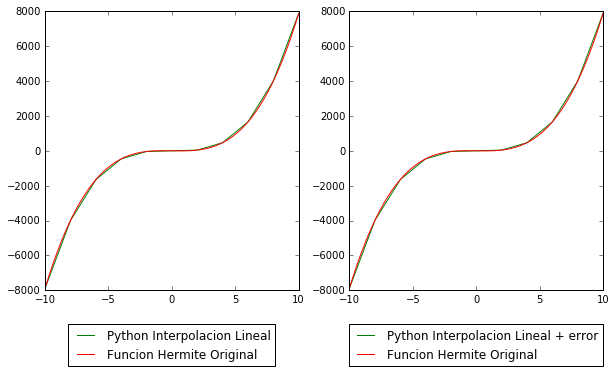

In [29]:
xe = np.linspace(-10,10,200)
xl = np.linspace(-10.,10.,11)
f = lambdify(x, RES)
yl = f(xl)

freal = lambdify(x, RES)
yreal = freal(xe)

#numpy lineal
yinterp_lineal = np.interp(xe, xl, yl)

#mas ruido
r = np.random.rand(len(xl))
ruido = 0.01
error = r*ruido
yl_err = yl + error
yinterp_lineal_error = np.interp(xe, xl, yl_err)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xe,yinterp_lineal, color = "g", label= "Python Interpolacion Lineal")
plt.plot(xe,yreal, color = "r", label= "Funcion Hermite Original")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.plot(xe,yinterp_lineal_error, color = "g", label= "Python Interpolacion Lineal + error")
plt.plot(xe,yreal, color = "r", label= "Funcion Hermite Original")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

### 1.7. <font color='red'>Extiéndase programas para calcular los polinomios intepolantes en la base de algoritmos segmentarias lineal y parabólica para calcular las primeras derivadas y realícese las tareas 1.4 respecto la primera derivada.</font>

Derivando con métodos numéricos y probar con método analítico [ayuda](https://en.wikipedia.org/wiki/Numerical_differentiation)

In [30]:
print "Original function:"
nueva = simplify(RES)
nueva

Original function:


In [31]:
print "Derivative with SYMPY"
Derivada = diff(RES,x)
Derivada

Derivative with SYMPY


Relacion de recurrencia para derivada de Hermite
![img](https://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D%5Cfrac%7Bd%7D%7Bdx%7D+H_n%28x%29%3D2+n+H_%7Bn-1%7D%28x%29.%5Cend%7Baligned%7D+%5Chspace%7B%5Cstretch%7B1%7D%7D%282.2%29&bg=fafcff&fg=2a2a2a&s=0)
[ayuda](https://peeterjoot.wordpress.com/2012/01/03/derivative-recurrence-relation-for-hermite-polynomials/)

In [32]:
def Diff_Hermite(n):
    return 2*n*PolHermite(n-1)
DiffHermite = Diff_Hermite(3)
DiffHermite

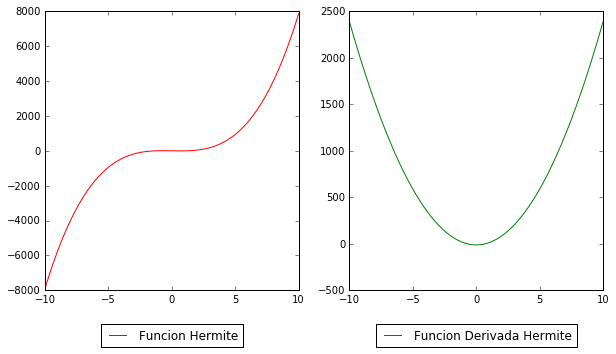

In [33]:
xe = np.linspace(-10,10,200)
f = lambdify(x, RES)
yl = f(xe)
fd = lambdify(x, DiffHermite)
yd = fd(xe)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xe,yl, color = "r", label= "Funcion Hermite")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.plot(xe,yd, color = "g", label= "Funcion Derivada Hermite")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))



### 1.8. <font color='red'>Realícese las tareas 1.4 y 1.5 primera y segunda derivada con programas SPLINE-SEVAL.</font>

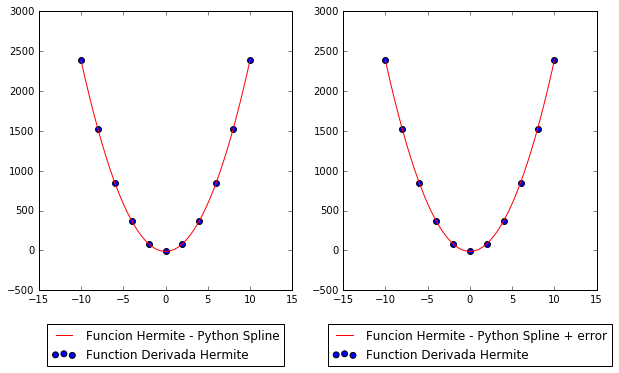

In [34]:
#Primera derivada usando splines

a,b=-10,10
dPn = DiffHermite #primera derivada
df = lambdify(x, dPn)
xl = np.linspace(a,b,11)
yl = df(xl)
spl = UnivariateSpline(xl, yl)
yinterp_splines = spl(xe)
yreal = df(xe)
#mas ruido
r = np.random.rand(len(xl))
ruido = 0.01
error = r*ruido
yl_err = yl + error
spl_err = UnivariateSpline(xl, yl_err)
yinterp_splines_err = spl_err(xe)

xd = np.linspace(-10,10,11)
y = lambdify(x,DiffHermite,'numpy')#Funcion Hermite
fun_Analitycal = y(xd)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xe,yinterp_splines, color = "r", label= "Funcion Hermite - Python Spline")
plt.scatter(xd, fun_Analitycal, c="blue", label = "Function Derivada Hermite",s=35)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.plot(xe,yinterp_splines_err, color = "r", label= "Funcion Hermite - Python Spline + error")
plt.scatter(xd, fun_Analitycal, c="blue", label = "Function Derivada Hermite",s=35)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

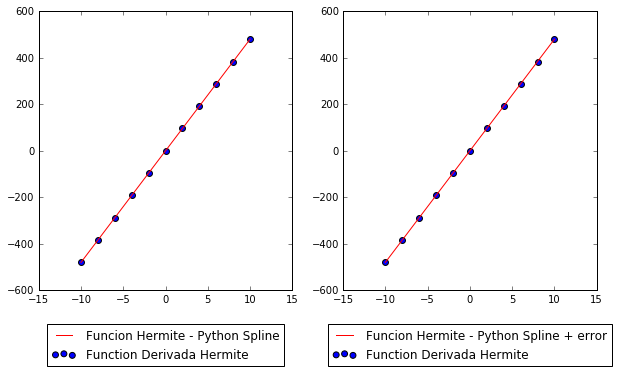

In [35]:
#Segunda derivada usando splines
a,b=-10,10

d2Pn = DiffHermite.diff(x) # segunda derivada
d2f = lambdify(x, d2Pn)
xl2 = np.linspace(a,b,11)
yl2 = d2f(xl)

spl = UnivariateSpline(xl2, yl2)
yinterp_splines = spl(xe)
yreal = d2f(xe)
#mas ruido
r = np.random.rand(len(xl2))
ruido = 0.01
error = r*ruido
yl2_err = yl2 + error
spl_err = UnivariateSpline(xl2, yl2_err)
yinterp_splines_err = spl_err(xe)

xd = np.linspace(-10,10,11)
y = lambdify(x,DiffHermite.diff(x),'numpy')#Funcion Hermite
fun_Analitycal = y(xd)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.

#graficas

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xe,yinterp_splines, color = "r", label= "Funcion Hermite - Python Spline")
plt.scatter(xd, fun_Analitycal, c="blue", label = "Function Derivada Hermite",s=35)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.plot(xe,yinterp_splines_err, color = "r", label= "Funcion Hermite - Python Spline + error")
plt.scatter(xd, fun_Analitycal, c="blue", label = "Function Derivada Hermite",s=35)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

# TAREA 2

### 1.1. <font color='red'>Dentro del intervalo de definición de su polinomio calcúleselos valores de los integrales</font> <font color='blue'>$I_n^{(m)} = \int_{a}^{b} w(x)P_n(x)P_{n+m}(x)dx$ para $n = \bar{1.5}$ y $m=\bar{0,5}$</font><font color='red'>, usando cuadraturas de trapecios, de Simpson y de Gauss con selección de paso de integración automático en la base del algoritmo de Runge.</font>

In [36]:
print "Symbolic solution:"
lim_a,lim_b = 1.,3.
Sym_Integral = integrate(RES,(x,lim_a,lim_b))
Sym_Integral

Symbolic solution:


### Metodo del <font color='red'>trapecio</font>
En análisis numérico la regla del trapecio es un método de integración, es decir, un método para calcular aproximadamente el valor de una integral definida. La regla se basa en aproximar el valor de la integral de $\displaystyle f(x)$ f(x) por el de la función lineal, que pasa a través de los puntos $\displaystyle (a,f(a))$ $\displaystyle (a,f(a))$ y $\displaystyle (b,f(b))$ $\displaystyle (b,f(b))$. La integral de ésta es igual al área del trapecio bajo la gráfica de la función lineal. [ayuda](https://es.wikipedia.org/wiki/Regla_del_trapecio)

In [37]:
def integral_trapecios(f,a,b,n):
    area = 0 # area bajo la curva
    h = (b-a)/n
    X = [a]
    Y = [f.subs(x,a)]
    for i in range(n): # cada segmento
        xi = a + h*i #x0 y x1
        xi1 = a+ h*(i+1)
        yi,yi1 = f.subs(x,xi),f.subs(x,xi1)
        area_trap = (h/2.)*(yi+yi1)
        area += area_trap
        X.append(xi1)
        Y.append(yi1)
    return area,X,Y

Metodo de trapecios:  119.111111111111
Diferencia:  -7.11111111111106


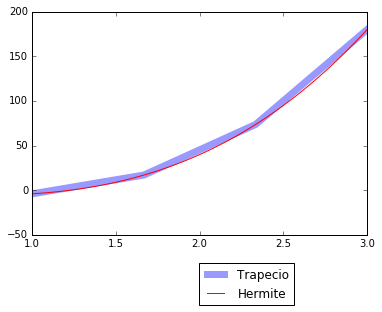

In [38]:
n_integral = 3
Trapecio, X, Y = integral_trapecios(RES,lim_a,lim_b,n_integral)
print "Metodo de trapecios: ",Trapecio
print "Diferencia: ",Sym_Integral-Trapecio

xe = np.linspace(lim_a,lim_b,100)
y = lambdify(x,RES,'numpy')#Funcion Hermite
Ay = y(xe)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.

plt.plot(X, Y, c="b", label = "Trapecio",lw=7,alpha=0.4)
plt.plot(xe,Ay, color = "r", label= "Hermite")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()

### Metodo del <font color='red'>Simpson</font>
En integración numérica, una forma de aproximar una integral definida en un intervalo $[a,b]$ es mediante la regla del trapecio, es decir, que sobre cada subintervalo en el que se divide $[a,b]$ se aproxima f por un polinomio de primer grado, para luego calcular la integral como suma de las áreas de los trapecios formados en esos subintervalos . El método utilizado para la regla de Simpson sigue la misma filosofía, pero aproximando los subintervalos de f mediante polinomios de segundo grado.

En el caso de que el intervalo [a,b] no sea lo suficientemente pequeño, el error al calcular la integral puede ser muy grande. Para ello, se recurre a la fórmula compuesta de Simpson. Se divide el intervalo [a,b] en n subintervalos iguales (con n par), de manera que $\displaystyle x_{i}=a+ih$ $\displaystyle x_{i}=a+ih$, donde $\displaystyle h=(b-a)/n$ $\displaystyle h=(b-a)/n$ para $\displaystyle i=0,1,...,n$ $\displaystyle i=0,1,...,n$.

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/7fd2b03035b6497c2f6197a628a2d358d8685b2d)

In [39]:
def integral_simpson(f,a,b,n):
    print "Método Simpson General: ", ((b-a)/6.)*(f.subs(x,a)+(4*f.subs(x,(a+b/2.)))+f.subs(x,b))
    suma = 0 
    h = (b-a)/n
    Xs = []
    for i in range(1,n): # terminos del medio
        xi = a + h*(i) #x0 y x1
        if i%2 == 0: #es par?
            suma+=2*f.subs(x,xi)
        else:
            suma+=4*f.subs(x,xi)
        #print "xi:",xi,"suma:",suma,"h:",h
        Xs.append(xi)
    suma = (h/3.)*(f.subs(x,a)+suma+f.subs(x,b))
    
    return Xs,suma

Método Simpson General:  185.333333333333
Metodo de Simpson 1/3:  112.000000000000


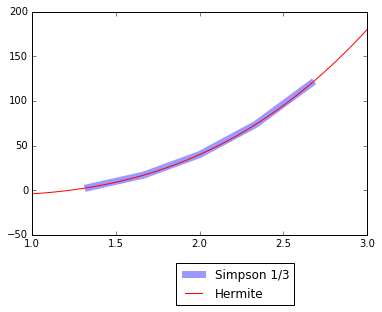

In [40]:
Xs,integralSimpson = integral_simpson(RES,lim_a, lim_b, 6)
print "Metodo de Simpson 1/3: ",integralSimpson

Xs =np.array(Xs)
y = lambdify(x,RES,'numpy')#Funcion Hermite
At = y(Xs)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.


plt.plot(Xs, At, c="b", label = "Simpson 1/3",lw=7,alpha=0.4)
plt.plot(xe,Ay, color = "r", label= "Hermite")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()

### Metodo de <font color='red'>Gauss</font>
En análisis numérico un método de cuadratura es una aproximación de una integral definida de una función. Una cuadratura de Gauss n, es una cuadratura que selecciona los puntos de la evaluación de manera óptima y no en una forma igualmente espaciada, construida para dar el resultado de un polinomio de grado 2n-1 o menos, elegibles para los puntos xi y los coeficientes wi para i=1,...,n. El dominio de tal cuadratura por regla es de [−1, 1]dada por: 
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/f779c2c2b743529c71bda0dfa8386c721739271e) tal cuadratura dará resultados precisos solo si f(x) es aproximado por un polinomio dentro del rango $[−1, 1]$. Si la función puede ser escrita como $f(x)=W(x)g(x)$, donde $g(x)$ es un polinomio aproximado y $W(x)$ es conocido 
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/c207ab2e2c3ce1c2802deefa49feff2db9de56bc)
Los cambios de intervalos van de [−1, 1] después de aplicar la cuadratura de Gauss:
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/3319c1ad08a87ce212be3d6ddf2d76ad4d22f08b)
Después de aplicar la cuadratura la aproximación es:
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/dc484aab3e9008b93fedc3f24773a06db8e29667)

[ayuda](https://es.wikipedia.org/wiki/Cuadratura_de_Gauss)

In [41]:
def legendre_rodrigues(n):
    suma = 0
    x = symbols('x')
    polinomio = 0 
    for k in range(n+1):
        tmp = (comb(n,k)**2)*((x+1.)**(n-k))*(x-1.)**k
        suma = suma+tmp
    p = (1.0/(2.**n))*suma
    return p

def cuadratura_gauss(a,b,n,f):
    #Obtengo los 0's del polinomio de legendre con formula de rodrigues
    x = Symbol('x')
    zeros = solve(legendre_rodrigues(n),x) #Pn tiene n 0's
    #0's son mis xi (nodos) y los puedo elevar a un numero, ahora es un sistema lineal :D
    #Derivada del polinomio
    DPn = diff(legendre_rodrigues(n)) 
    integ = 0
    #Despejo coeficientes Wi
    
    w = []
    
    for xi in zeros:
        wi = 2./((1.-xi**2)*(DPn.evalf(subs={x:xi}))**2)
        w.append(wi)
    #print w 
    # integral de f = sum (wi f(xi))
    # Cambio de variables para integrar en (a,b)
    integ = 0
    for k in range(0,n):
        xk = zeros[k]
        integ += w[k]*f.subs(x,((b+a)/2. + (b-a)*(float(xk)/2.)))
    
    integ = ((b-a)/2.)*integ
    for i in range(n):
        print "W"+str(i)+": ",w[k]," x"+str(i)+" :",zeros[i]
    return integ

In [42]:
%time valor = cuadratura_gauss(lim_a, lim_b, 3, RES)
print "Integral por Gauss: ", valor
print "Diferencia: ", (Sym_Integral - valor)

W0:  0.555555555555555  x0 : -0.774596669241483
W1:  0.555555555555555  x1 : 0.0
W2:  0.555555555555555  x2 : 0.774596669241483
CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 147 ms
Integral por Gauss:  112.000000000000
Diferencia:  1.42108547152020e-14


### 1.2. <font color='red'>Realícese las tareas 1.1 con programa QUANC8.</font>

El sub-paquete scipy.integrate ofrece varias técnicas de integración, incluyendo un diferencial ordinaria integrador ecuación. Una visión general del módulo es proporcionado por el comando de ayuda:
[ayuda](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

In [ ]:
'''quad          -- General purpose integration.
   dblquad       -- General purpose double integration.
   tplquad       -- General purpose triple integration.
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n.
   quadrature    -- Integrate with given tolerance using Gaussian quadrature.
   romberg       -- Integrate func using Romberg integration.

 Methods for Integrating Functions given fixed samples.

   trapz         -- Use trapezoidal rule to compute integral from samples.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                    (2**k + 1) evenly-spaced samples.

   See the special module's orthogonal polynomials (special) for Gaussian
      quadrature roots and weights for other weighting factors and regions.

 Interface to numerical integrators of ODE systems.

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.'''

In [44]:
%time result0 = sci_integrate.quad(f,lim_a, lim_b)
print "Metodo numerico python scipy: ",result0[0]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 50.1 µs
Metodo numerico python scipy:  112.0


# TAREA 3

### 1.1. <font color='red'>Elabórese el algoritmo de separación de ceros de su polinomio $P_n(x)$.</font>

In [45]:
timesTarea3 = [] #list of times Tarea 3

In [46]:
def separar(a,b,f,h):
    nraices = 0
    xi = a
    xd = xi + h
    yi, yd = f.subs(x,xi), f.subs(x,xd)
    intervalos = []
    while xd<b:
        if yi*yd<0:
            nraices +=1
            intervalos.append([xi-h,xd-h,yi,yd])
        xi, yi = xd, yd
        xd, yd = xi+h,f.subs(x,xd)
    return nraices, intervalos

### 1.2. <font color='red'>Dentro del intervalo de definición de su polinomio encuéntrese los ceros de los polinomios $P_n(x),P_{n+1}(x),P_{n+2}(x)$ para $n = 5$ y $n =10$ usando los métodos de bisección y de Newton. Asegúrese que las raíces del polinomio $P_n(x)$ se ubican entre las raíces del polinomio $P_{n+1}(x)$ y las raíces del polinomio $P_{n+1}(x)$ se ubican entre las raíces del polinomio $p_{n+1}(x)$.</font>

### Metodo de <font color='red'>Biseccion</font>

In [47]:
def biseccion(a, b, f, tol,maxiter):
    c = (a+b)/2.
    anch = b-a
    raizB = 0
    if f.subs(x,a)*f.subs(x,b)>=0:
        print "a,b: ",a,b
        print "fa,fb: ",f.subs(x,a), f.subs(x,b)
        print "La funcion debe tener diferente signo en a y b!"
        return "no evaluable", 0,0
    else:
        i = 0
        while f.subs(x,c)!= 0 or anch<= tol: 
            i+=1 
            fa,fc = f.subs(x,a),f.subs(x,c)
            if fa*fc>0:
                #print "muevo izq"
                b = c
            else:
                #print "muevo der"
                a = c
            c = (a+b)/2.
            anch = b - a
            raizB = c
            error = np.abs(b-a)
            if maxiter is not None:
                if i >= maxiter:
                    break
        return raizB, f.subs(x,raizB)


Numero de raices encontradas fn:  3
CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 231 ms
CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 273 ms
CPU times: user 276 ms, sys: 0 ns, total: 276 ms
Wall time: 276 ms


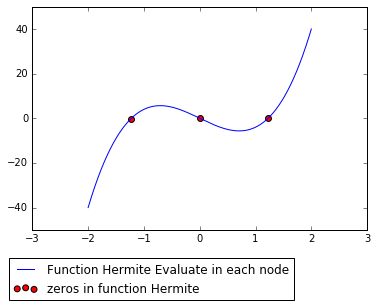

In [48]:
tol = 1e-5
maxiter = 1e3

startTime = time.time()
fn = lambdify(x, RES)
raicesBiseccion = []
nraices, intervalos = separar(a,b,RES,0.01)
print "\nNumero de raices encontradas fn: ", nraices

for i in intervalos:
    %time raiz, fraiz = biseccion(i[0] , i[1] , RES, tol,maxiter)
    raicesBiseccion.append(raiz)
finalTime = time.time()
timesTarea3.append(finalTime-startTime)
zeros = np.array(raicesBiseccion)
xd = np.linspace(-2,2,1000)
y = lambdify(x,RES,'numpy')#Funcion Hermite
fun_Analitycal = y(xd)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.
yz = y(zeros)

plt.plot(xd, fun_Analitycal, c="blue", label = "Function Hermite Evaluate in each node")
plt.scatter(zeros,yz,c="r",s=35,label="zeros in function Hermite")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()


### Metodo de <font color='red'>Newton Rapson</font>

La convergencia habitual de Newton-Raphson depende de la función que tiene un derivado distinto de cero en la raíz.
Si hay una raíz múltiple, entonces la derivada en la raíz es 0 y esto no se sostiene más. En el mejor de los casos la raíz es una raíz doble, y la función se ve localmente como una parábola de tocar el xx-eje cerca de la raíz. A continuación, el error se reduce a la mitad para cada iteración de la aproximación, más que al cuadrado, y el número de iteraciones que necesita es proporcional al número de dígitos correctos que desea encontrar. (Para raíces individuales, el número de iteraciones es proporcional a desea el logaritmo del número de dígitos correctos).

In [49]:
def newton_raphson(a,tol):
    xn = a
    f = RES.subs(x, xn)
    df = Derivada.subs(x,xn) 
    i = 0
    while np.abs(f-0)>tol:
        xn = xn-f/df
        f = RES.subs(x,xn)
        df = Derivada.subs(x,xn)
        i+=1
    print "Raiz en: ",xn
    print "f(x): ",f
    return xn, f

In [50]:
a,b=-20,20
startTime = time.time()
%time raiz, f = newton_raphson(-20,tol=1e-7)
finalTime = time.time()
timesTarea3.append(finalTime-startTime)

Raiz en:  -1.22474487236280
f(x):  -2.33091821399967e-8
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 18.5 ms


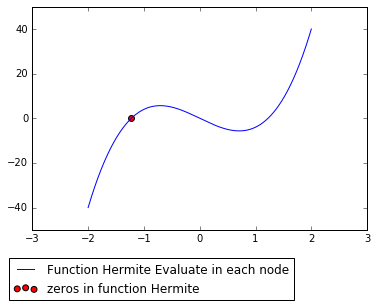

In [51]:
zeros = np.array(zeros)
xd = np.linspace(-2,2,1000)
y = lambdify(x,RES,'numpy')#Funcion Hermite
fun_Analitycal = y(xd)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.
yz = y(zeros)

plt.plot(xd, fun_Analitycal, c="blue", label = "Function Hermite Evaluate in each node")
plt.scatter(raiz,f,c="r",s=35,label="zeros in function Hermite")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()

### 1.3. <font color='red'>Realícese la tarea 1.2 con programa ZEROIN o FZERO.</font>

Para <font color='blue'>Python</font>,la función <b>Solve</b> de la librería <b>Sympy</b>, los parametros que recibe es la función simbólica y el eje en el cual hace los cortes. [ayuda](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [52]:
startTime = time.time()
%time zeros = solve(RES,x)
finalTime = time.time()
timesTarea3.append(finalTime-startTime)
print "ceros en mi polinomio Hermite: "
zeros

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 37.3 ms
ceros en mi polinomio Hermite: 


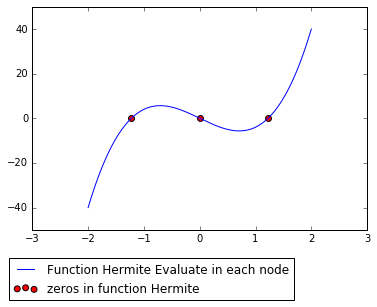

In [53]:
zeros = np.array(zeros)
xd = np.linspace(-2,2,1000)
y = lambdify(x,RES,'numpy')#Funcion Hermite
fun_Analitycal = y(xd)#Evalua la funcion en los nodos equidistantes, obtengo los puntos que debería tener.
yz = y(zeros)

plt.plot(xd, fun_Analitycal, c="blue", label = "Function Hermite Evaluate in each node")
plt.scatter(zeros,yz,c="r",s=35,label="zeros in function Hermite")
plt.legend(loc='best', bbox_to_anchor=(0.8, -0.1))
plt.show()

### 1.4. <font color='red'>Presente el análisis comparativo de los resultados obtenidos en los puntos 1.2 y 1.3.</font>

In [54]:
x = range(len(timesTarea3))
y = timesTarea3
print "Biseccion - Newton Rapson - Solve_Python",y

Biseccion - Newton Rapson - Solve_Python [3.1280601024627686, 0.02031397819519043, 0.038902997970581055]


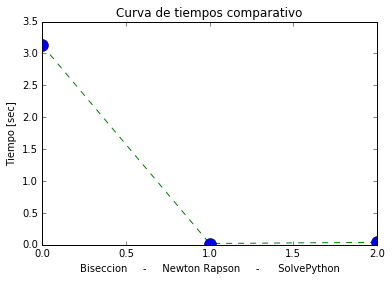

In [55]:
plt.plot(x, y, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Biseccion     -     Newton Rapson     -      SolvePython')
plt.ylabel('Tiempo [sec]')
plt.title('Curva de tiempos comparativo')